**Newton-módszer**

In [2]:
def newtons_method(x: int, guess=0) -> tuple:

    if x < 1 : 
        raise ValueError

    if guess:
        a = guess
    else: 
        a = x//10 + 10

    b = (a*a + x) // (2*a)             
    steps = 0

    while (a != b):
        
        if (a == b-1): 
            return min(a, b), steps                                                                                                                           
        
        a = b  
        b = (a*a + x) // (2*a)  
        steps += 1  
            
    return a, steps

**Intervallumfelezés**

In [3]:
def bisection(x: int, guess=0) -> tuple:

    steps = 0
    a = 1

    if guess:
        b = guess
    else: 
        b = x//10 + 10

    if x < 1: 
        raise ValueError
    if x == 1:  
        return x, steps

    while (a != b-1) and (a != b):
        
        c = (a+b) // 2
        steps += 1

        if (c**2 <= x):
            a = c
        else:
            b = c
    
    return a, steps

**Teszt**

In [4]:
import numpy as np
import pytest as pt
import ipytest
ipytest.autoconfig()

In [4]:
%%ipytest

def test_sqrts():

    for i in range(1, 10**5):
        assert newtons_method(i)[0] == bisection(i)[0] == int(np.sqrt(i))

    with pt.raises(ValueError):
        newtons_method(0)
        newtons_method(-5)
        bisection(0)
        bisection(-5)

.                                                                                            [100%]
1 passed in 1.81s


**Futásidő**

In [5]:
%%timeit

for i in range(1, 10**5):
    newtons_method(i)

292 ms ± 4.19 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [6]:
%%timeit

for i in range(1, 10**5):
    bisection(i)

948 ms ± 39.7 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


Átlagosan a Newton-módszer gyorsabb.

In [5]:
import matplotlib.pyplot as plt
from timeit import default_timer as timer

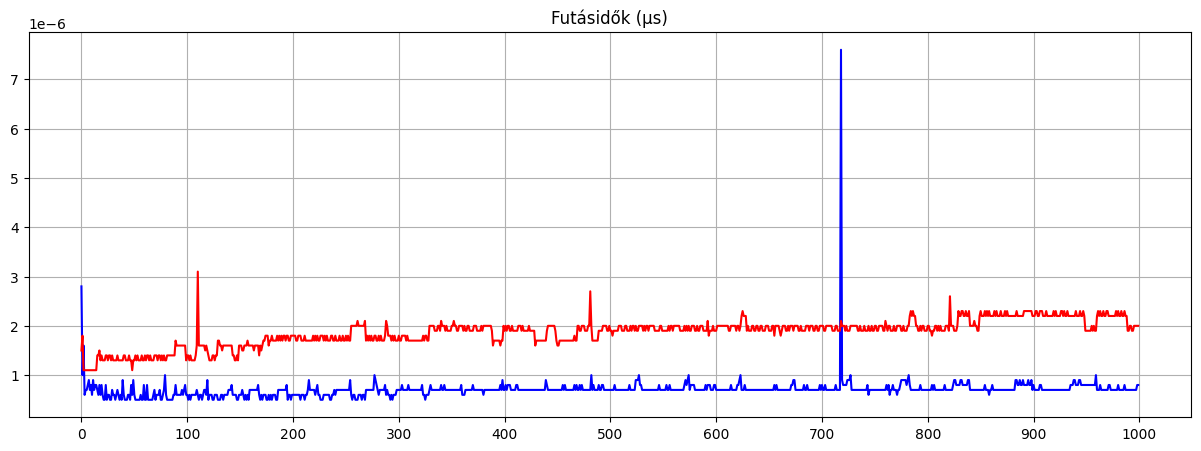

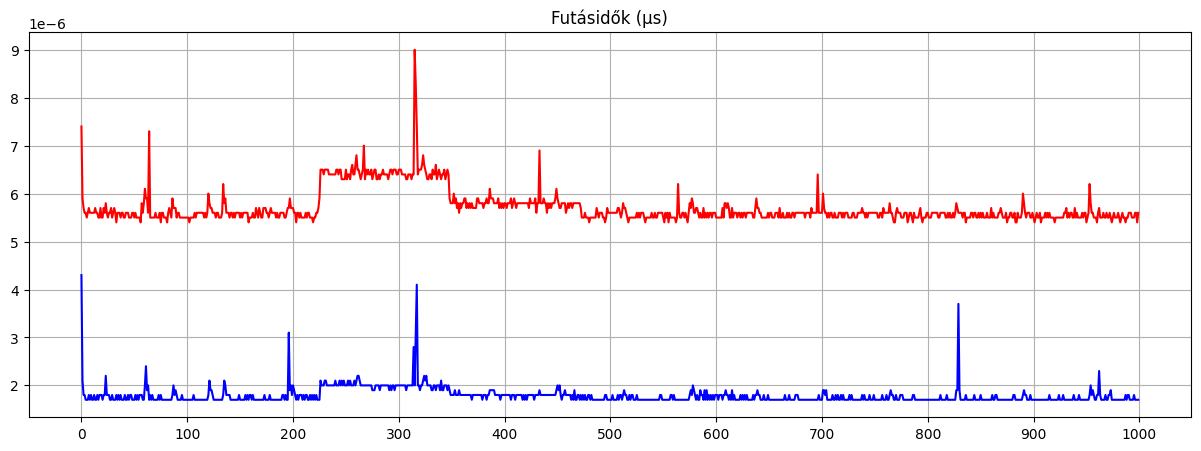

In [6]:
lst_newt_time  = []
lst_bisec_time = []

for i in range(1, 1001):  
    
    t0 = timer()
    newtons_method(i)
    lst_newt_time.append(timer()-t0)

    t0 = timer()
    bisection(i)
    lst_bisec_time.append(timer()-t0)

plt.figure(figsize=(15, 5))
plt.title('Futásidők (μs)')
plt.xticks([x for x in range(0, 1001, 100)])
plt.plot(lst_newt_time, c='b', label='Newton-módszer')
plt.plot(lst_bisec_time, c='r', label='Intervallumfelezés')
plt.grid()


lst_newt_time  = []
lst_bisec_time = []

for i in range(10**6 +1, 10**6 + 1001):  
    t0 = timer()
    newtons_method(i)
    lst_newt_time.append(timer()-t0)

    t0 = timer()
    bisection(i)
    lst_bisec_time.append(timer()-t0)

plt.figure(figsize=(15, 5))
plt.title('Futásidők (μs)')
plt.xticks([x for x in range(0, 1001, 100)])
plt.plot(lst_newt_time, c='b', label='Newton-módszer')
plt.plot(lst_bisec_time, c='r', label='Intervallumfelezés')
plt.grid()

plt.show()

Mostmár látjuk, hogy a Newton módszer sokkal gyorsabb kis és nagy számokra is.

**Lépésszám**

In [193]:
l = []

for i in range(1, 10**6):
    ln, lb = [], []
    ln.append(newtons_method(i)[1])
    lb.append(bisection(i)[1])
    l.append(sum(lb)/(sum(ln)))

np.mean(l)

1.8103085614990375

Az intervallumfelezés majdnem kétszerannyi lépéssel végez.

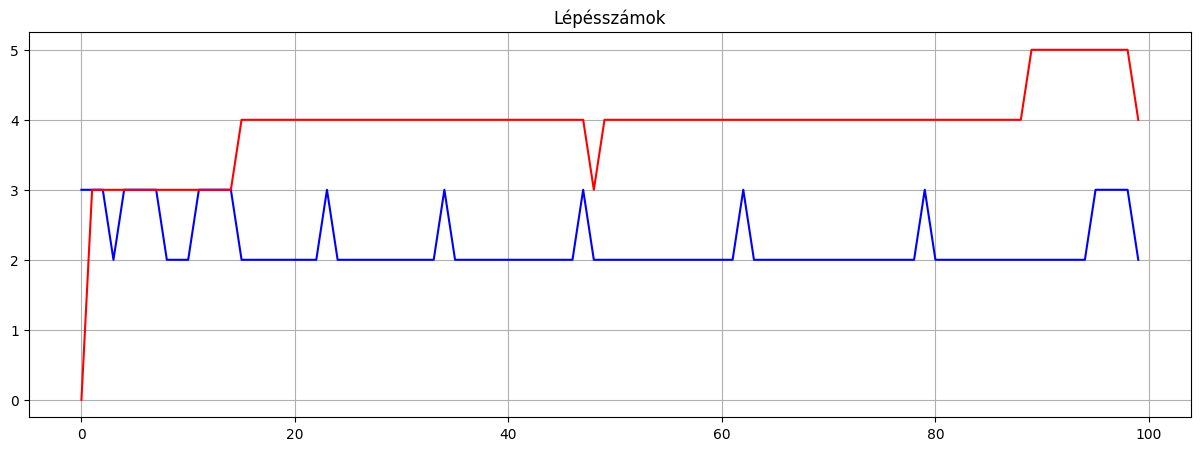

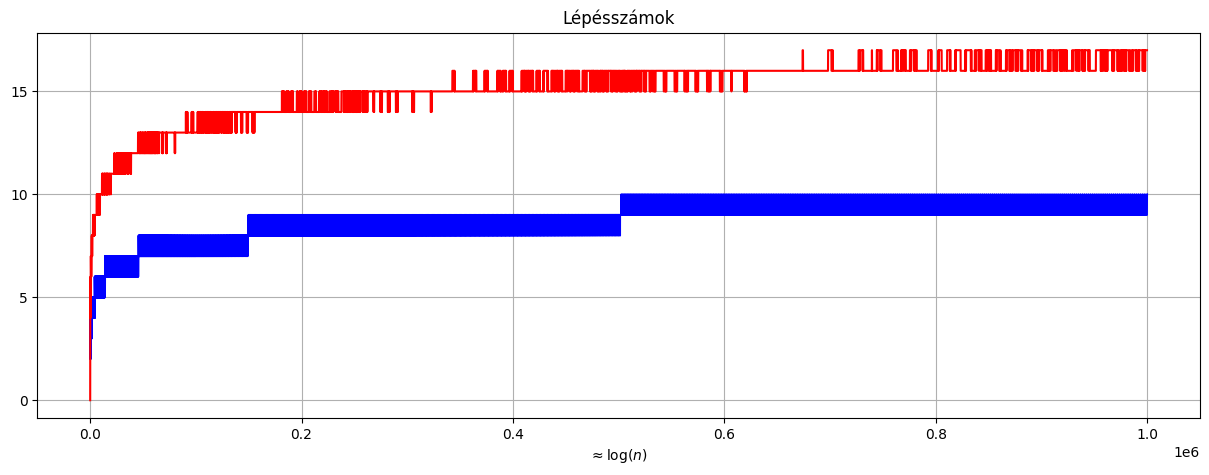

In [12]:
lst_newt_steps  = []
lst_bisec_steps = []

for i in range(1, 101):  
    lst_newt_steps.append(newtons_method(i)[1])
    lst_bisec_steps.append(bisection(i)[1])

plt.figure(figsize=(15, 5))
plt.title('Lépésszámok')
plt.plot(lst_newt_steps, c='b', label='Newton-módszer')
plt.plot(lst_bisec_steps, c='r', label='Intervallumfelezés')
plt.grid()


lst_newt_steps  = []
lst_bisec_steps = []

for i in range(1, 10**6):  
    lst_newt_steps.append(newtons_method(i)[1])
    lst_bisec_steps.append(bisection(i)[1])

plt.figure(figsize=(15, 5))
plt.title('Lépésszámok')
plt.xlabel('$\\approx \\log(n)$')
plt.yticks([y for y in range(0, 20, 5)])
plt.plot(lst_newt_steps, c='b', label='Newton-módszer')
plt.plot(lst_bisec_steps, c='r', label='Intervallumfelezés')
#plt.xscale('log')
plt.grid()

plt.show()

$n>16$-ra már kevesebb lépést is igényel a Newton-módszer, nagy számokra ez a különbség jelentős.

**Az eredményekből tisztán látszik, hogy a Newton-iteráció a gyorsabb módszer.**